# About
Context
This dataset is of casting manufacturing product.
Casting is a manufacturing process in which a liquid material is usually poured into a mould, which contains a hollow cavity of the desired shape, and then allowed to solidify.
Reason for collect this data is casting defects!!
Casting defect is an undesired irregularity in a metal casting process.
There are many types of defect in casting like blow holes, pinholes, burr, shrinkage defects, mould material defects, pouring metal defects, metallurgical defects, etc.
Defects are an unwanted thing in casting industry. For removing this defective product all industry have their quality inspection department. But the main problem is this inspection process is carried out manually. It is a very time-consuming process and due to human accuracy, this is not 100% accurate. This can because of the rejection of the whole order. So it creates a big loss in the company.

We decided to make the inspection process automatic and for this, we need to make deep learning classification model for this problem.

contain
These all photos are top view of submersible pump impeller(google search for better understanding).
The dataset contains total 7348 image data. These all are the size of (300*300) pixels grey-scaled images. In all images, augmentation already applied.

Also uploaded images size of 512x512 grayscale. This data set is without Augmentation. This contains 519 ok_front and 781 def_front impeller images.

For capturing these images requires stable lighting, for this we made a special arrangement.

there are mainly two categories:-
1) Defective
2)Ok

making classification model we already split data for training and testing into two folders.
Both train and test folder contains def_front and ok_front subfolders.

train:- def_front have 3758 and ok_front have 2875 images
test:- def_front have:- def_front have 453 and ok_front have 262 images

Acknowledgements
We wouldn't be here without the help of PILOT TECHNOCAST, Shapar, Rajkot. we have to thank them for constant support and allowing us to work for this problem.

Prototype
We also made Working prototype using this dataset. Click here

Contact detail
If you want to know more about project and dataset drop mail on ravirajsinhdabhi86@gmail.com or DM me on LinkedIn

In [4]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.6 MB/s eta 0:00:00


In [3]:
#import required libraries
import os
from os import path
import zipfile
import numpy as np
import time
import shutil
from shutil import copyfile

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import seaborn as sns
import PIL
from PIL import Image

from numpy import asarray

import cv2

import random
from random import shuffle

import gc


import tensorflow as tf
import keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input as preprocess_input_vgg16
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_fscore_support, fbeta_score, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from mlxtend.plotting import plot_confusion_matrix

In [2]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00


In [6]:
#Configure GPU Device Name
device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

GPU device not found
Found GPU at: 


In [5]:
import os
import zipfile

# نصب و احراز هویت با API Kaggle
!pip install kaggle
# آپلود فایل kaggle.json به مسیر /root/.kaggle/ قبل از اجرای کد

# دانلود دیتاست
!kaggle datasets download -d ravirajsinh45/real-life-industrial-dataset-of-casting-product

# استخراج فایل ZIP
zip_file_path = 'real-life-industrial-dataset-of-casting-product.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('dataset')

# مسیرهای داده
src_folder = "/content/drive/MyDrive/Ph.D Student/Special Topics in Artificial Intelligence and Robotics 2/Exercise One"

# ایجاد دایرکتوری‌ها در صورت عدم وجود
os.makedirs(os.path.join(src_folder, "train"), exist_ok=True)
os.makedirs(os.path.join(src_folder, "test"), exist_ok=True)

# شمارش نمونه‌ها
def count_samples(folder):
    print("Number of samples in: " + folder)
    src = os.path.join(src_folder, folder)
    # بررسی وجود دایرکتوری
    if not os.path.exists(src):
        print(f"Directory {src} does not exist.")
        return [], []
    classes = os.listdir(src)
    class_sizes = [len(os.listdir(os.path.join(src, cls))) for cls in classes]
    for cls, size in zip(classes, class_sizes):
        print(f"{cls}: {size}")
    return classes, class_sizes

# شمارش نمونه‌ها
train_classes, train_classes_size = count_samples("train")
test_classes, test_classes_size = count_samples("test")


Dataset URL: https://www.kaggle.com/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
real-life-industrial-dataset-of-casting-product.zip: Skipping, found more recently modified local copy (use --force to force download)
Number of samples in: train
Number of samples in: test


In [6]:
import os
import zipfile

# نصب و احراز هویت با API Kaggle
!pip install kaggle
# آپلود فایل kaggle.json به مسیر /root/.kaggle/ قبل از اجرای کد

# دانلود دیتاست
!kaggle datasets download -d ravirajsinh45/real-life-industrial-dataset-of-casting-product

# استخراج فایل ZIP
zip_file_path = 'real-life-industrial-dataset-of-casting-product.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('dataset')

# مسیرهای داده
src_folder = "/content/drive/MyDrive/Ph.D Student/Special Topics in Artificial Intelligence and Robotics 2/casting_data"  # مسیر را به دایرکتوری استخراج شده تغییر دهید

# ایجاد دایرکتوری‌ها در صورت عدم وجود
os.makedirs(os.path.join(src_folder, "train"), exist_ok=True)
os.makedirs(os.path.join(src_folder, "test"), exist_ok=True)

# شمارش نمونه‌ها
def count_samples(folder):
    print("Number of samples in: " + folder)
    src = os.path.join(src_folder, folder)
    if not os.path.exists(src):
        print(f"Directory {src} does not exist.")
        return [], []
    classes = os.listdir(src)
    class_sizes = [len(os.listdir(os.path.join(src, cls))) for cls in classes]
    for cls, size in zip(classes, class_sizes):
        print(f"{cls}: {size}")
    return classes, class_sizes

# شمارش نمونه‌ها
train_classes, train_classes_size = count_samples("train")
test_classes, test_classes_size = count_samples("test")


Dataset URL: https://www.kaggle.com/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
real-life-industrial-dataset-of-casting-product.zip: Skipping, found more recently modified local copy (use --force to force download)
Number of samples in: train
Number of samples in: test


In [8]:
# نصب و احراز هویت با API Kaggle
!pip install kaggle
from google.colab import drive
import os

# اتصال به گوگل درایو
drive.mount('/content/drive')

# ایجاد پوشه در گوگل درایو
drive_folder = '/content/drive/MyDrive/Casting_Dataset'
os.makedirs(drive_folder, exist_ok=True)

# دانلود دیتاست از Kaggle
!kaggle datasets download -d ravirajsinh45/real-life-industrial-dataset-of-casting-product

# استخراج فایل ZIP
zip_file_path = 'real-life-industrial-dataset-of-casting-product.zip'
!unzip -o {zip_file_path} -d {drive_folder}

# حذف فایل ZIP بعد از استخراج
os.remove(zip_file_path)

print("Dataset has been downloaded and uploaded to Google Drive.")


Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Casting_Dataset/casting_data/casting_data/train/def_front/cast_def_0_526.jpeg  
  inflating: /content/drive/MyDrive/Casting_Dataset/casting_data/casting_data/train/def_front/cast_def_0_5260.jpeg  
  inflating: /content/drive/MyDrive/Casting_Dataset/casting_data/casting_data/train/def_front/cast_def_0_5262.jpeg  
  inflating: /content/drive/MyDrive/Casting_Dataset/casting_data/casting_data/train/def_front/cast_def_0_5265.jpeg  
  inflating: /content/drive/MyDrive/Casting_Dataset/casting_data/casting_data/train/def_front/cast_def_0_527.jpeg  
  inflating: /content/drive/MyDrive/Casting_Dataset/casting_data/casting_data/train/def_front/cast_def_0_5270.jpeg  
  inflating: /content/drive/MyDrive/Casting_Dataset/casting_data/casting_data/train/def_front/cast_def_0_5272.jpeg  
  inflating: /content/drive/MyDrive/Casting_Dataset/casting_data/casting_data/train/def_front/cast_def_0_5274.jpeg  
  inflating: /c

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# مسیر دیتاست در گوگل درایو
drive_folder = '/content/dataset/casting_data/casting_data'
train_dir = os.path.join(drive_folder, 'train')
test_dir = os.path.join(drive_folder, 'test')

# تقسیم‌بندی تصاویر به train و test
# ابتدا لیست تمام تصاویر را دریافت می‌کنیم
all_images = os.listdir(train_dir)

# تقسیم‌بندی داده‌ها به train و test
train_images, test_images = train_test_split(all_images, test_size=0.2, random_state=42)

# ایجاد DataFrame برای استفاده در Keras
train_df = pd.DataFrame(train_images, columns=['filename'])
test_df = pd.DataFrame(test_images, columns=['filename'])

# مشاهده تعداد تصاویر در هر دیتافریم
print("Train set size:", len(train_df))
print("Test set size:", len(test_df))

# ایجاد Data Generator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# بارگذاری تصاویر با استفاده از flow_from_dataframe
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_dir,
    x_col='filename',
    y_col=None,  # اگر برچسب دارید، نام ستون آن را قرار دهید
    class_mode=None,  # تغییر دهید به 'categorical' یا 'binary' اگر برچسب دارید
    target_size=(224, 224),  # سایز تصویر
    batch_size=32,
    shuffle=True
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=train_dir,
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(224, 224),
    batch_size=32,
    shuffle=False
)


Train set size: 1
Test set size: 1
Found 0 validated image filenames.
Found 0 validated image filenames.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [2]:
import os

# مسیر دیتاست در گوگل درایو
drive_folder = '/content/dataset/casting_data/casting_data'
train_dir = os.path.join(drive_folder, 'train')

# بررسی محتوای پوشه
all_images = os.listdir(train_dir)
print(f"Total images in train directory: {len(all_images)}")
print("Images:", all_images)


Total images in train directory: 2
Images: ['ok_front', 'def_front']


In [3]:
import os
import numpy as np
from os import path

# Prepare data
src_folder = "/content/dataset/casting_data/casting_data"

training_src = path.join(src_folder, "train")
test_src = path.join(src_folder, "test")

if not os.path.exists(training_src):
    raise FileNotFoundError(f"Training directory not found: {training_src}")
if not os.path.exists(test_src):
    raise FileNotFoundError(f"Test directory not found: {test_src}")

CLASSES = os.listdir(training_src)
print("Classes found: " + str(CLASSES))
print("----------------")

def count_samples(folder):
    print("Number of samples in: " + folder)
    src = path.join(src_folder, folder)

    if not os.path.exists(src):
        raise FileNotFoundError(f"Directory not found: {src}")

    class_names = os.listdir(src)
    class_size = np.zeros(len(class_names), dtype=int)

    for i, class_name in enumerate(class_names):
        class_src = path.join(src, class_name)
        if os.path.exists(class_src):
            class_size[i] = len(os.listdir(class_src))
            print(class_name + " : " + str(class_size[i]))
        else:
            print(f"Class directory not found: {class_src}")

    print("----------------")

    return class_names, class_size

train_classes, train_classes_size = count_samples("train")
test_classes, test_classes_size = count_samples("test")


Classes found: ['ok_front', 'def_front']
----------------
Number of samples in: train
ok_front : 2875
def_front : 3758
----------------
Number of samples in: test
ok_front : 262
def_front : 453
----------------


In [4]:
img_rows, img_cols = 224, 224

dsize = (img_rows, img_cols)

def data_prep(class_array, class_size, src_set):


    num_classes = len(CLASSES)

    y = []
    X = []

    for i in range(num_classes):

        print("Class " + class_array[i] + " Started")

        class_src = path.join(src_set, class_array[i])
        src_list = os.listdir(class_src)
        data_y = np.array([i for m in range(len(src_list))])
        data_x = np.array([np.array(cv2.resize(cv2.imread(class_src+"/"+src_list[m]), dsize)) for m in range(len(src_list))])
        reshape_x = data_x.flatten().reshape(len(src_list), img_rows, img_cols, 3)/255

        y.append(data_y)
        X.append(reshape_x)

        del data_x
        del data_y
        gc.collect()

        print("Class " + class_array[i] + " Completed")


    array_X = X[0]
    array_y = y[0]
    for j in range(len(class_array)-1):
        array_X = np.append(array_X, X[j+1], axis=0)
        array_y = np.append(array_y, y[j+1], axis=0)

    del X
    del y
    gc.collect()

    #is the shuffling good?
    temp = list(zip(array_X, array_y))

    del array_X
    del array_y
    gc.collect()

    random.shuffle(temp)
    list_X, list_y = zip(*temp)

    del temp
    gc.collect()

    out_X = np.array(list_X)
    del list_X
    gc.collect()

    out_y = np.array(list_y)
    del list_y
    gc.collect()

    return out_X, out_y

In [5]:
import cv2
import gc


In [6]:
import gc
gc.collect()


4

In [6]:
#!pip install opencv-python-headless

In [7]:
import os
import numpy as np
import tensorflow as tf
from os import path

# Prepare data
src_folder = "/content/dataset/casting_data/casting_data"
training_src = path.join(src_folder, "train")
test_src = path.join(src_folder, "test")

# Function to load data using tf.data.Dataset
def data_prep(directory, batch_size=16):  # Batch size reduced to save memory
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        image_size=(224, 224),
        batch_size=batch_size,
        shuffle=True  # Shuffle the dataset for better training
    )
    return dataset

# Load training data
print("Preparing Training Data...")
train_dataset = data_prep(training_src)
print("Training Data Complete...")
# Note: Shape is not directly available in Dataset, but we can check one batch shape
for images, labels in train_dataset.take(1):
    print("Shape of Training Data : ", images.shape)
print("-------------------------")

# Load test data
print("Preparing Test Data...")
test_dataset = data_prep(test_src)
print("Test Data Complete...")
for images, labels in test_dataset.take(1):
    print("Shape of Test Data : ", images.shape)
print("-------------------------")

# Optionally: Free memory
import gc
gc.collect()


Preparing Training Data...
Found 6633 files belonging to 2 classes.
Training Data Complete...
Shape of Training Data :  (16, 224, 224, 3)
-------------------------
Preparing Test Data...
Found 715 files belonging to 2 classes.
Test Data Complete...
Shape of Test Data :  (16, 224, 224, 3)
-------------------------


0

In [3]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adamax

In [4]:
!pip install --upgrade tensorflow scikit-learn


Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.
Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 46s 164ms/step - accuracy: 0.5531 - loss: 0.7054 - val_accuracy: 0.6364 - val_loss: 0.6267
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.6486 - loss: 0.6374 - val_accuracy: 0.6825 - val_loss: 0.5994
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step - accuracy: 0.6727 - loss: 0.6180 - val_accuracy: 0.4755 - val_loss: 0.7174
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 42s 104ms/step - accuracy: 0.7023 - loss: 0.5909 - val_accuracy: 0.7497 - val_loss: 0.5655
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - accuracy: 0.7064 - loss: 0.5674 - val_accuracy: 0.7329 - val_loss: 0.5401
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 44s 113ms/step - accuracy: 0.7269 - loss: 0.5469 - val_accuracy: 0.6685 - val_loss: 0.6061
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - accuracy: 0.7523 - loss: 0.5202 - val_accuracy: 0.7399 - val_loss: 0.5133
Ep

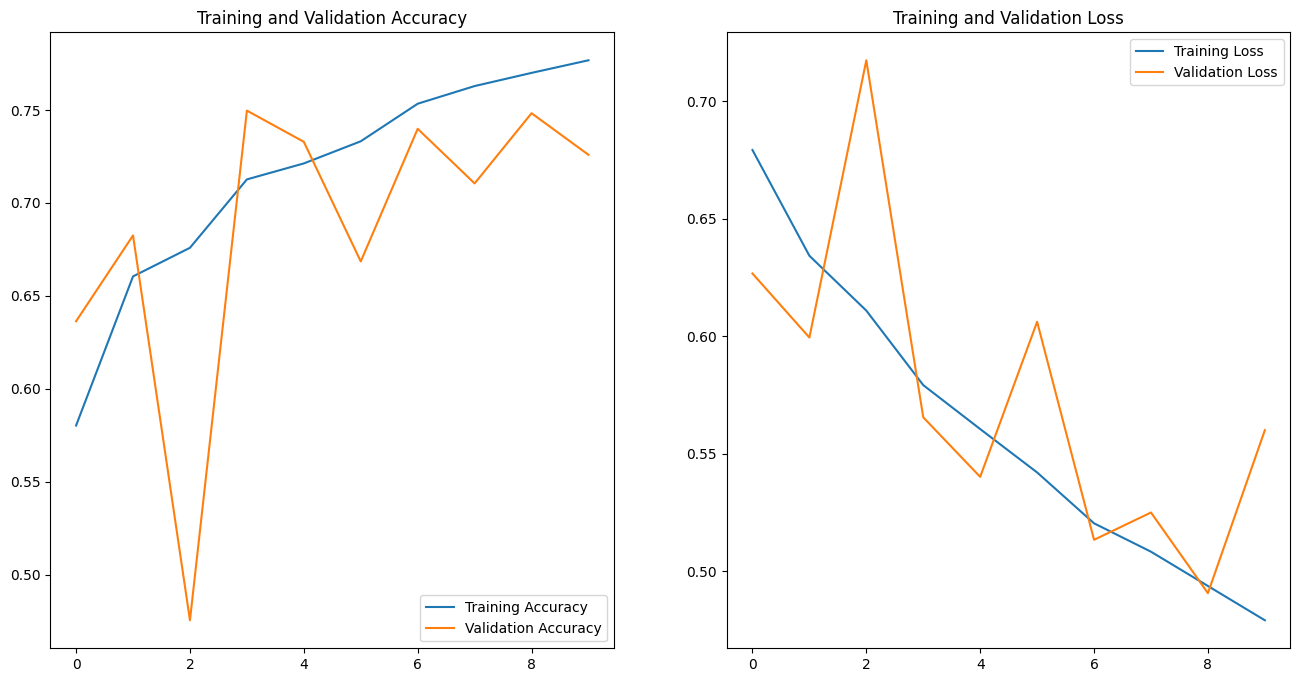

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# تعریف مسیرهای داده
src_folder = "/content/dataset/casting_data/casting_data"
training_src = os.path.join(src_folder, "train")
test_src = os.path.join(src_folder, "test")

# تابع برای ساخت مدل
def create_model(learning_rate=0.001, units=256):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(units, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)

    transfer_model = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    transfer_model.compile(optimizer=Adamax(learning_rate=learning_rate),
                           loss='binary_crossentropy',
                           metrics=['accuracy'])
    return transfer_model

# ایجاد ژنراتور داده
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# بارگذاری داده‌های آموزشی و تست
train_generator = train_datagen.flow_from_directory(
    training_src,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_src,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# ایجاد مدل
model = create_model()

# آموزش مدل و ذخیره تاریخچه
epochs = 10
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

# ذخیره مدل در مسیر مشخص
model_save_path = '/content/drive/MyDrive/PhD-Student/Artificial-Intelligence-Robotics/Exercise-One/Resnet50_Casting_Inspection.hdf5'
model.save(model_save_path)  # ذخیره مدل

# استخراج تاریخچه
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

# ترسیم دقت و ضرر
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [26]:
def predict_plot(MODEL, CLASS_ARRAY, TEST_X, TEST_Y):
    loaded_model = tf.keras.models.load_model(MODEL)

    predictions = loaded_model.predict(TEST_X)

    class_predictions = np.zeros(len(predictions), dtype=int)

    for i in range(len(predictions)):
        if predictions[i] > 0.5:
            class_predictions[i] = 1
        else:
            class_predictions[i] = 0


    cm  = tf.math.confusion_matrix(TEST_Y, class_predictions).numpy()
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.set(font_scale=3.0)
    sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap='BuGn', ax=ax)
    ax.set_title('Confusion matrix', fontsize=15)
    ax.set_xlabel('Predicted', fontsize=15)
    ax.set_xticklabels(CLASS_ARRAY, fontsize=15, rotation='vertical')
    ax.set_ylabel('Actual', fontsize=15)
    ax.set_yticklabels(CLASS_ARRAY, fontsize=15, rotation='horizontal');


#     plt.figure()
#     plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
#     plt.xticks(range(2), CLASS_ARRAY, fontsize=16)
#     plt.yticks(range(2), CLASS_ARRAY, fontsize=16)
#     plt.show()

    # Calculate Precision and Recall
    tn, fp, fn, tp = cm.ravel()

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fscore = 2*((precision*recall)/(precision+recall))
    accuracy = (tp+fn)/(tp+tn+fp+fn)

    print("Recall of the model is {:.2f}".format(recall))
    print("Precision of the model is {:.2f}".format(precision))
    print("F-score of the model is {:.2f}".format(fscore))
    print("Accuracy of the model is {:.2f}".format(accuracy))

    del loaded_model
    gc.collect()

    return class_predictions

In [29]:
import numpy as np

# فرض بر این است که test_X و test_y به شکل لیست هستند
test_X = np.array(test_X)  # تبدیل به آرایه NumPy
test_y = np.array(test_y)  # تبدیل به آرایه NumPy
# بررسی شکل داده‌های تست
print("Shape of test_X:", test_X.shape)  # باید یک آرایه با شکل مشخص داشته باشد
print("Shape of test_y:", test_y.shape)  # همچنین باید آرایه‌ای با شکل معین داشته باشد


Shape of test_X: (0,)
Shape of test_y: (0,)


In [30]:
# بارگذاری داده‌های تست
test_generator = test_datagen.flow_from_directory(
    test_src,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# تعداد تصاویر در ژنراتور تست
print("Number of test samples:", test_generator.samples)  # تعداد نمونه‌های تست


Found 715 images belonging to 2 classes.
Number of test samples: 715


In [31]:
def predict_plot(MODEL, TEST_GENERATOR):
    loaded_model = tf.keras.models.load_model(MODEL)

    predictions = loaded_model.predict(TEST_GENERATOR)
    # بقیه کد پیش‌بینی و ترسیم نمودار


In [32]:
PREDICTIONS = predict_plot('/content/drive/MyDrive/PhD-Student/Artificial-Intelligence-Robotics/Exercise-One/Resnet50_Casting_Inspection.hdf5', test_generator)


23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step


23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step


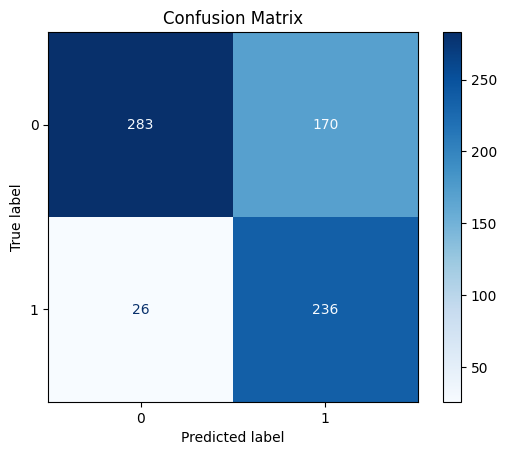

              precision    recall  f1-score   support

           0       0.92      0.62      0.74       453
           1       0.58      0.90      0.71       262

    accuracy                           0.73       715
   macro avg       0.75      0.76      0.72       715
weighted avg       0.79      0.73      0.73       715



In [35]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# بارگذاری مدل
model = tf.keras.models.load_model('/content/drive/MyDrive/PhD-Student/Artificial-Intelligence-Robotics/Exercise-One/Resnet50_Casting_Inspection.hdf5')

# استفاده از test_generator برای پیش‌بینی بر روی کل داده‌های تست
test_generator.reset()  # بازنشانی ژنراتور برای اطمینان از اینکه پیش‌بینی‌ها از ابتدا شروع می‌شوند
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int).flatten()  # برای دسته‌بندی باینری

# برچسب‌های واقعی
test_y_true = test_generator.classes

# محاسبه ماتریس سردرگمی
cm = confusion_matrix(test_y_true, predicted_classes)

# نمایش ماتریس سردرگمی
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# محاسبه و نمایش گزارش دسته‌بندی
report = classification_report(test_y_true, predicted_classes)
print(report)


23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step
Confusion Matrix:
[[283 170]
 [ 26 236]]
Accuracy: 0.7259
Precision: 0.5813
Recall: 0.9008
F1 Score: 0.7066
ROC AUC Score: 0.8504
Mean Squared Error (MSE): 0.2741
Mean Absolute Error (MAE): 0.2741
R-squared: -0.1808


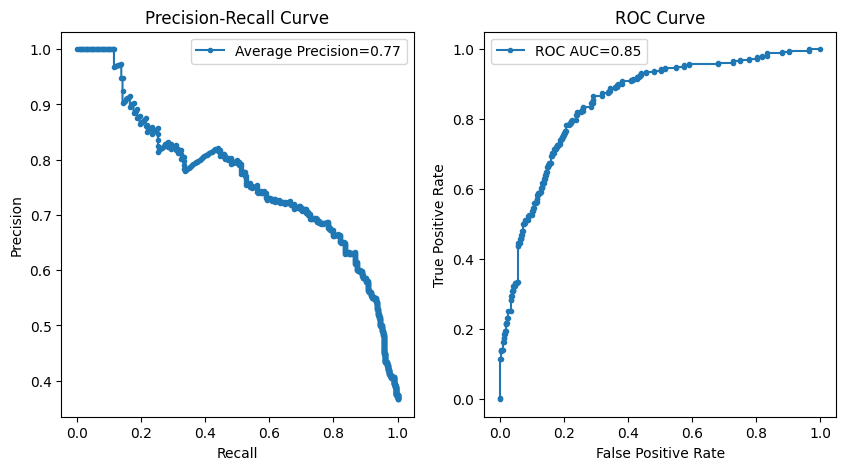

In [36]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_curve, roc_auc_score,
                             average_precision_score, mean_squared_error,
                             mean_absolute_error, r2_score, precision_recall_curve)
import matplotlib.pyplot as plt

# بارگذاری مدل
model = tf.keras.models.load_model('/content/drive/MyDrive/PhD-Student/Artificial-Intelligence-Robotics/Exercise-One/Resnet50_Casting_Inspection.hdf5')

# استفاده از test_generator برای پیش‌بینی بر روی کل داده‌های تست
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# برچسب‌های واقعی
test_y_true = test_generator.classes
test_y_prob = predictions.flatten()  # پیش‌بینی‌های احتمال

# محاسبه معیارها
cm = confusion_matrix(test_y_true, predicted_classes)
accuracy = accuracy_score(test_y_true, predicted_classes)
precision = precision_score(test_y_true, predicted_classes)
recall = recall_score(test_y_true, predicted_classes)
f1 = f1_score(test_y_true, predicted_classes)
roc_auc = roc_auc_score(test_y_true, test_y_prob)
mse = mean_squared_error(test_y_true, predicted_classes)
mae = mean_absolute_error(test_y_true, predicted_classes)
r2 = r2_score(test_y_true, predicted_classes)

# محاسبه منحنی دقت-بازیابی
precision_vals, recall_vals, _ = precision_recall_curve(test_y_true, test_y_prob)
average_precision = average_precision_score(test_y_true, test_y_prob)

# محاسبه منحنی ROC
fpr, tpr, _ = roc_curve(test_y_true, test_y_prob)

# نمایش معیارها
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared: {r2:.4f}")

# نمایش منحنی دقت-بازیابی
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(recall_vals, precision_vals, marker='.', label='Average Precision={:.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# نمایش منحنی ROC
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, marker='.', label='ROC AUC={:.2f}'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.show()


In [41]:
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

# ادامه کد شما
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# مسیر به مدل ذخیره‌شده (مدل از قبل آموزش داده شده)
model_path = '/content/drive/MyDrive/PhD-Student/Artificial-Intelligence-Robotics/Exercise-One/Resnet50_Casting_Inspection.hdf5'

# بارگذاری مدل
model = load_model(model_path)

# تابع برای پیش‌بینی یک تصویر
def predict_image(img_path, model):
    # بارگذاری و پردازش تصویر
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # نرمال‌سازی تصویر به محدوده [0, 1]

    # انجام پیش‌بینی
    prediction = model.predict(img_array)

    # اگر خروجی مدل شما یک لایه sigmoid باشد که خروجی باینری برمی‌گرداند
    if prediction >= 0.5:
        return "Defective"
    else:
        return "OK"

# مسیر به پوشه تصاویر جدید
image_folder = '/content/drive/MyDrive/Casting_Dataset/casting_data/casting_data/test'

# لیست تمام تصاویر موجود در پوشه
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg') or f.endswith('.png')]

# پیش‌بینی برای هر تصویر
for img_file in image_files:
    img_path = os.path.join(image_folder, img_file)
    result = predict_image(img_path, model)
    print(f"Image: {img_file}, Prediction: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


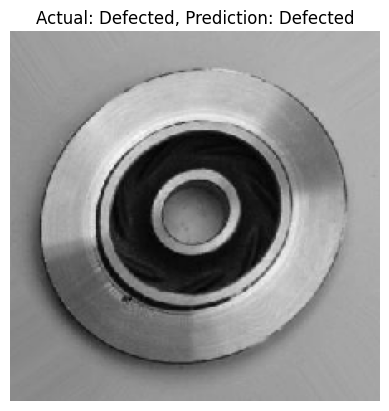

In [45]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# تابعی برای استخراج برچسب واقعی از مسیر تصویر
def get_actual_label(image_path):
    if 'ok' in image_path.lower():
        return "OK"
    elif 'def' in image_path.lower():
        return "Defected"
    else:
        return "Unknown"

# تابعی برای خواندن تصویر و انجام پیش‌بینی
def predict_image(image_path, model):
    # بارگذاری و پردازش تصویر
    img = image.load_img(image_path, target_size=(224, 224))  # سایز را مطابق مدل خود تنظیم کنید
    img_array = image.img_to_array(img)  # تبدیل به آرایه numpy
    img_array = np.expand_dims(img_array, axis=0)  # افزودن بعد برای Batch
    img_array = img_array / 255.0  # نرمال‌سازی تصویر

    # انجام پیش‌بینی
    prediction = model.predict(img_array)

    # تفسیر نتیجه
    predicted_class = np.round(prediction[0][0])  # احتمال پیش‌بینی را به ۰ یا ۱ تبدیل می‌کند

    if predicted_class == 1:
        return "Defected"
    else:
        return "OK"

# تابعی برای نمایش تصویر همراه با نتیجه پیش‌بینی و برچسب واقعی
def display_prediction(image_path, model):
    # پیش‌بینی نتیجه
    predicted_label = predict_image(image_path, model)

    # استخراج برچسب واقعی
    actual_label = get_actual_label(image_path)

    # نمایش تصویر
    img = image.load_img(image_path, target_size=(224, 224))
    plt.imshow(img)
    plt.title(f"Actual: {actual_label}, Prediction: {predicted_label}")
    plt.axis('off')
    plt.show()

# مسیر فایل مدل (اطمینان حاصل کنید که مسیر درست است)
model_path = '/content/drive/MyDrive/PhD-Student/Artificial-Intelligence-Robotics/Exercise-One/Resnet50_Casting_Inspection.hdf5'

# بارگذاری مدل
model = load_model(model_path)

# مسیر تصویری که می‌خواهید پیش‌بینی کنید
img_path = '/content/drive/MyDrive/Casting_Dataset/casting_data/casting_data/test/def_front/cast_def_0_1059.jpeg'

# نمایش نتیجه پیش‌بینی و برچسب واقعی
display_prediction(img_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


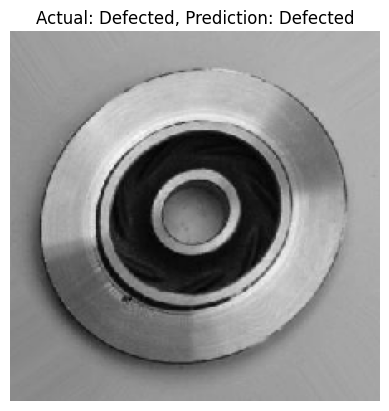

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


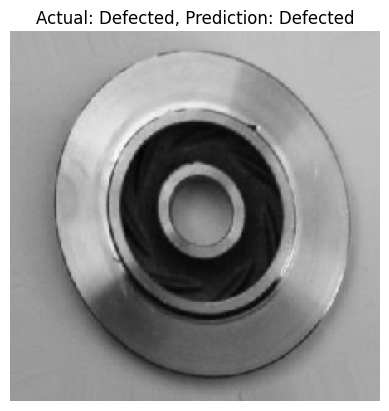

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


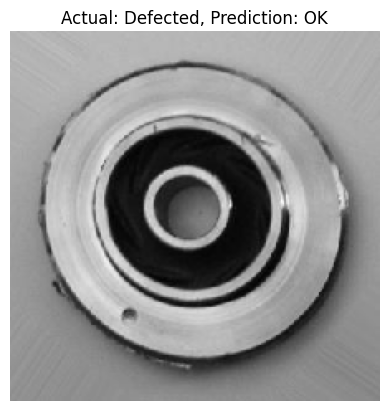

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


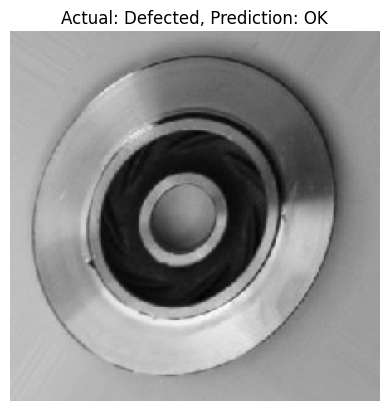

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


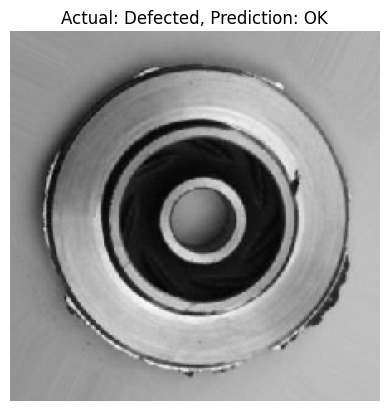

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


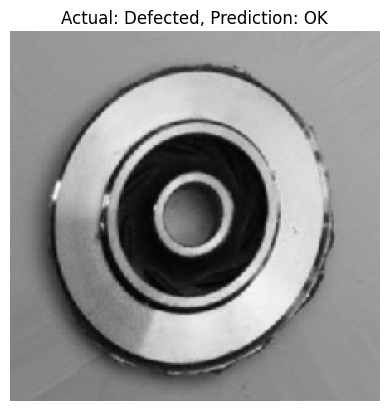

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


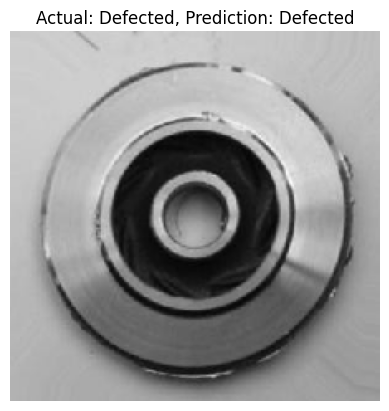

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


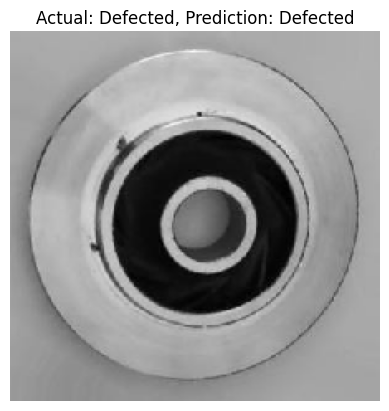

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


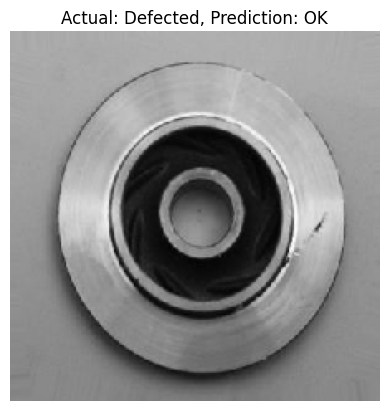

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


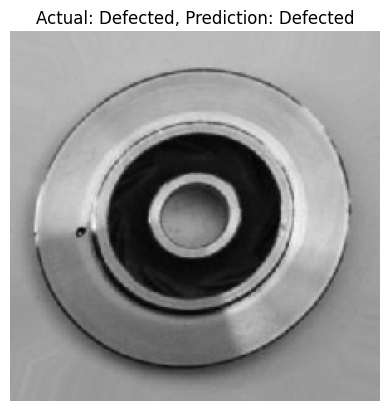

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


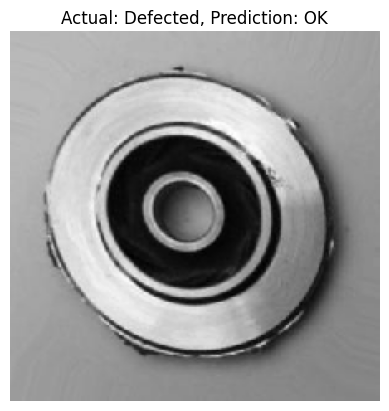

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


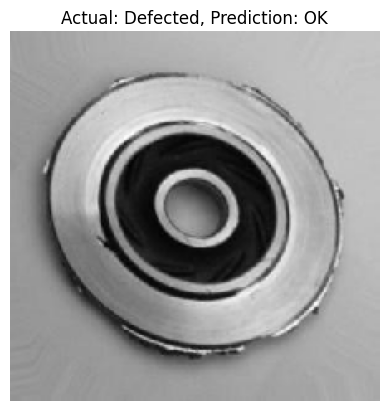

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


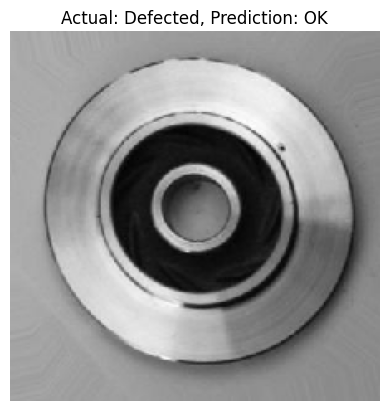

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


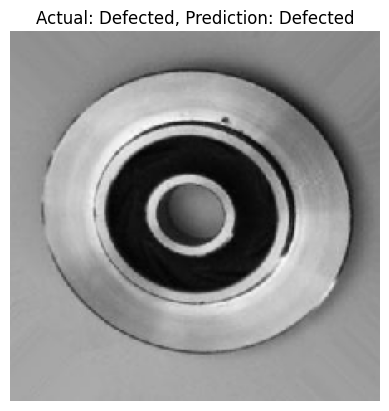

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


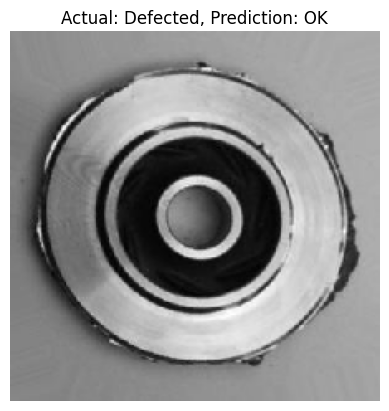

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


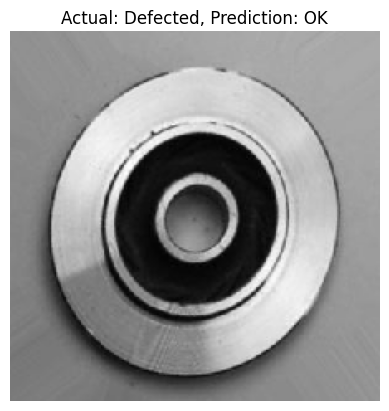

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


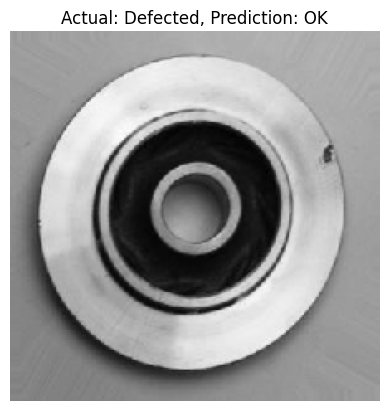

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


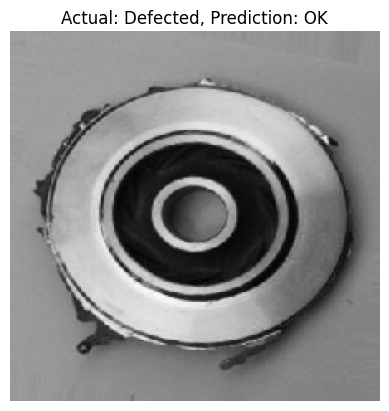

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


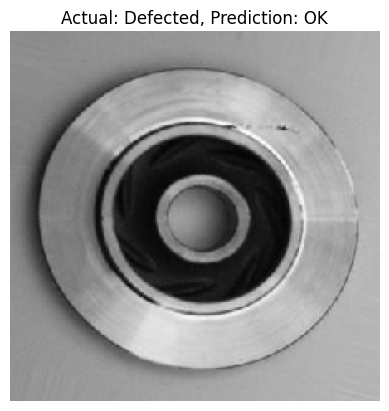

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


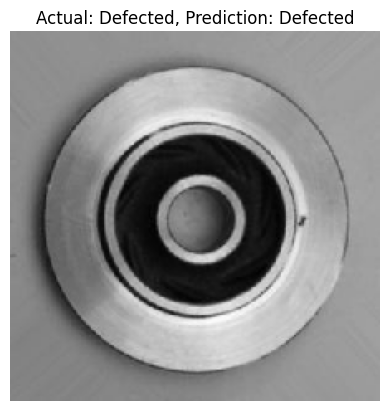

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


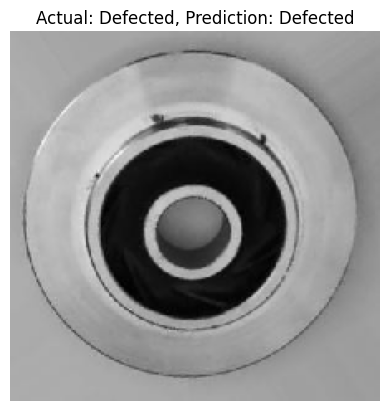

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


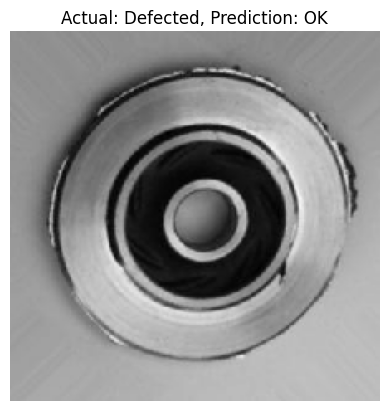

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


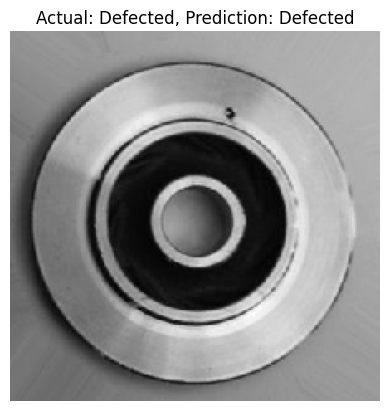

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


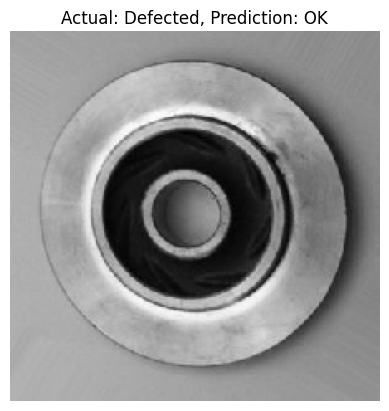

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


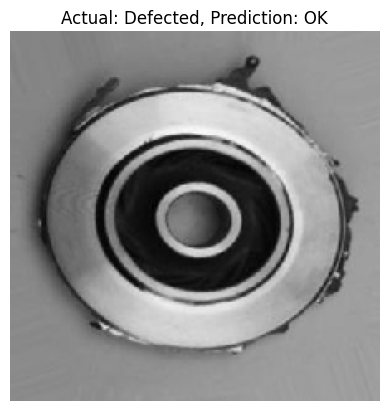

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


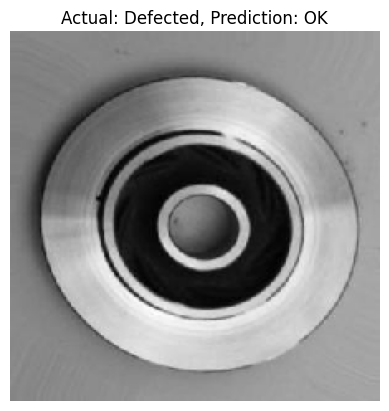

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


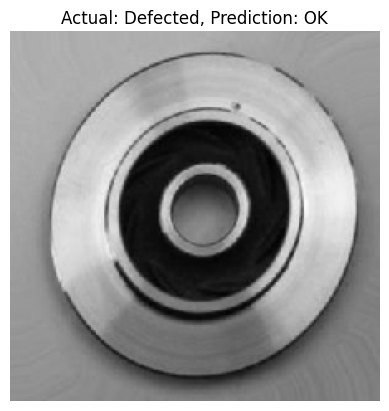

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


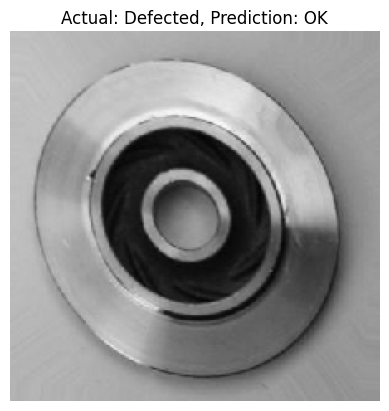

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


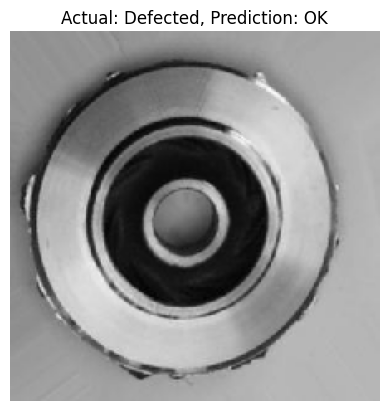

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


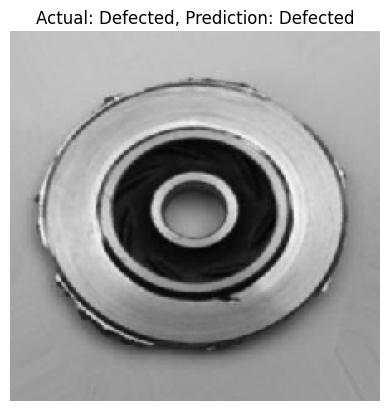

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


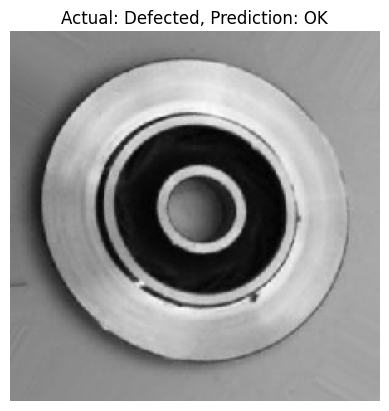

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


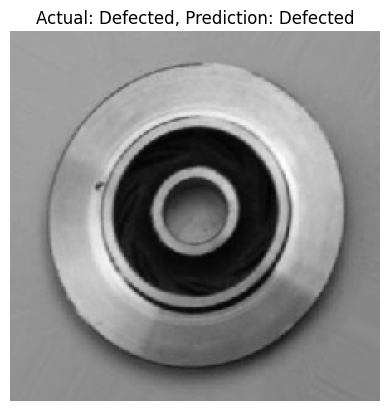

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


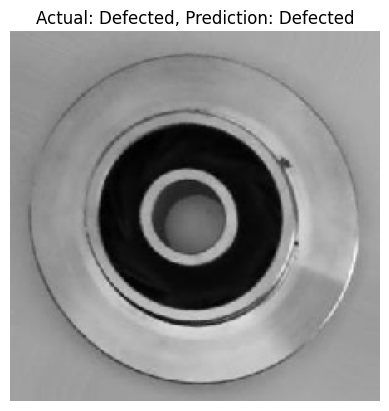

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


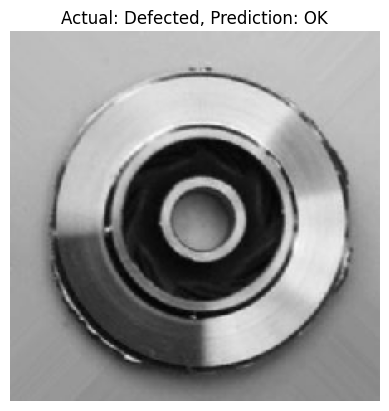

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


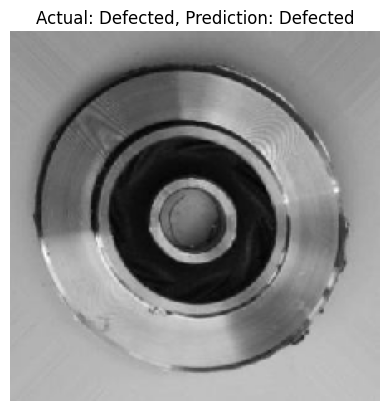

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


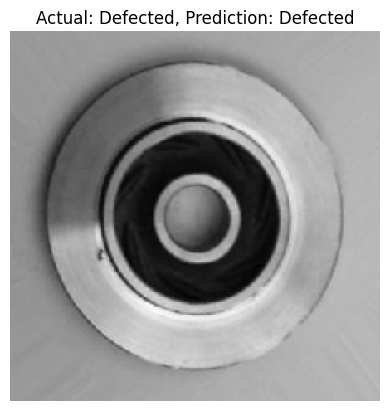

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


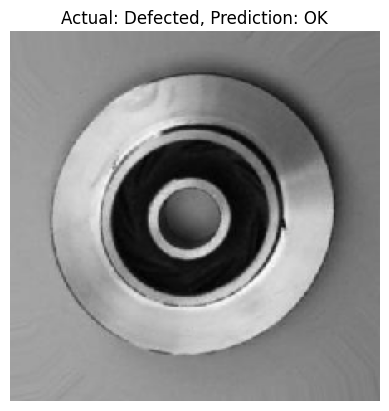

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


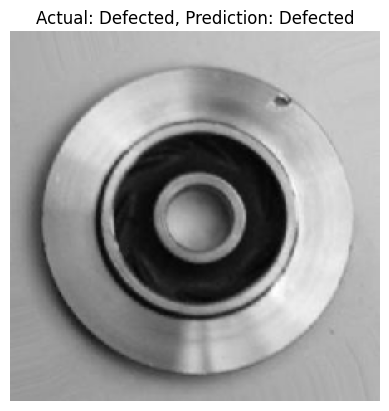

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


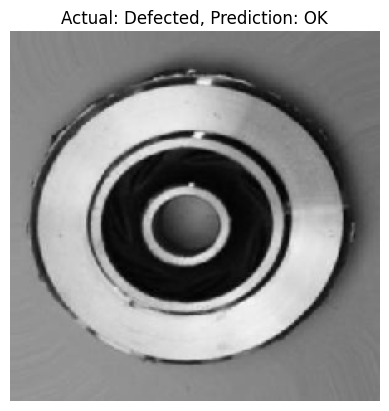

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


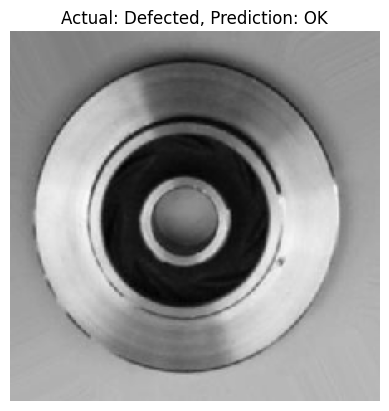

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


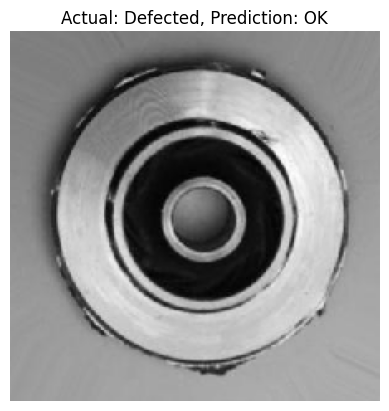

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


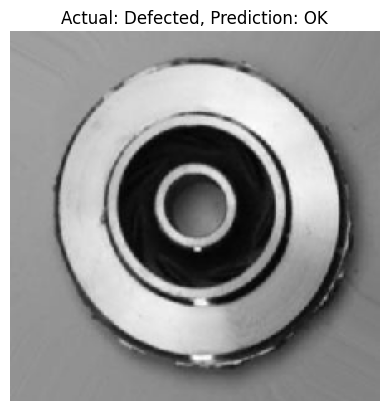

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


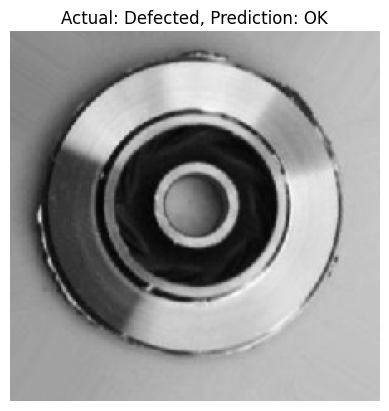

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


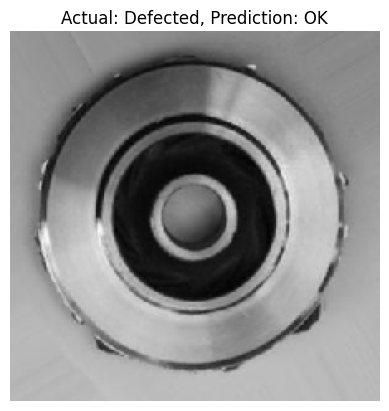

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


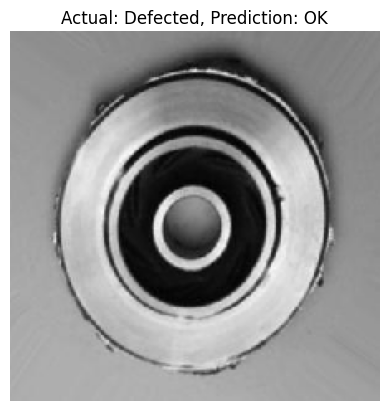

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


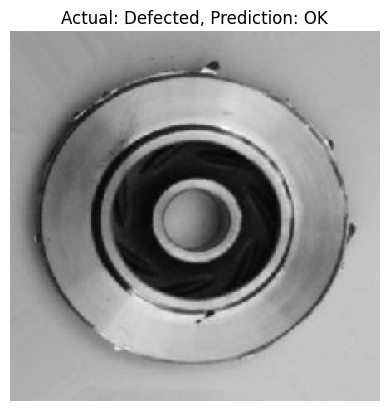

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


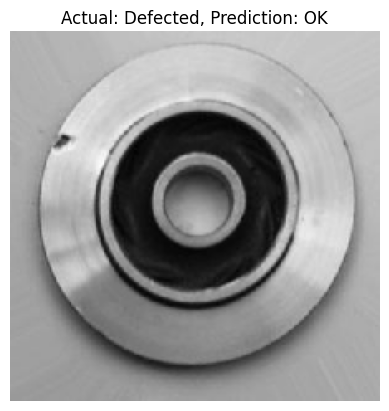

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


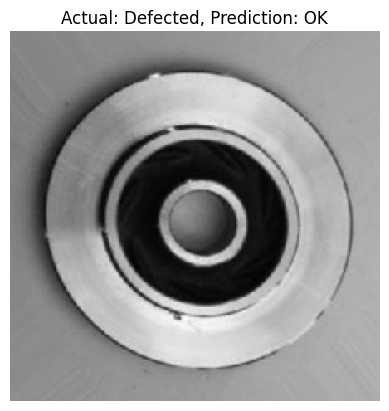

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


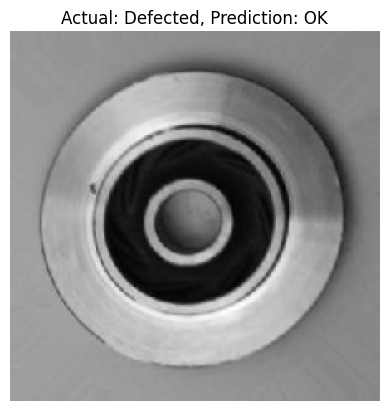

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# تابعی برای استخراج برچسب واقعی از مسیر تصویر
def get_actual_label(image_path):
    if 'ok' in image_path.lower():
        return "OK"
    elif 'def' in image_path.lower():
        return "Defected"
    else:
        return "Unknown"

# تابعی برای خواندن تصویر و انجام پیش‌بینی
def predict_image(image_path, model):
    # بارگذاری و پردازش تصویر
    img = image.load_img(image_path, target_size=(224, 224))  # سایز را مطابق مدل خود تنظیم کنید
    img_array = image.img_to_array(img)  # تبدیل به آرایه numpy
    img_array = np.expand_dims(img_array, axis=0)  # افزودن بعد برای Batch
    img_array = img_array / 255.0  # نرمال‌سازی تصویر

    # انجام پیش‌بینی
    prediction = model.predict(img_array)

    # تفسیر نتیجه
    predicted_class = np.round(prediction[0][0])  # احتمال پیش‌بینی را به ۰ یا ۱ تبدیل می‌کند

    if predicted_class == 1:
        return "Defected"
    else:
        return "OK"

# تابعی برای نمایش تصویر همراه با نتیجه پیش‌بینی و برچسب واقعی
def display_prediction(image_path, model):
    # پیش‌بینی نتیجه
    predicted_label = predict_image(image_path, model)

    # استخراج برچسب واقعی
    actual_label = get_actual_label(image_path)

    # نمایش تصویر
    img = image.load_img(image_path, target_size=(224, 224))
    plt.imshow(img)
    plt.title(f"Actual: {actual_label}, Prediction: {predicted_label}")
    plt.axis('off')
    plt.show()

# تابعی برای خواندن و نمایش تصاویر از پوشه‌ها
def process_and_display_images_from_folders(folder_path, model):
    # لیست کردن تمام تصاویر از دو کلاس OK و Defected
    for subdir, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.jpeg', '.jpg', '.png')):  # فرمت‌های معتبر تصویر
                image_path = os.path.join(subdir, file)
                display_prediction(image_path, model)

# مسیر فایل مدل (اطمینان حاصل کنید که مسیر درست است)
model_path = '/content/drive/MyDrive/PhD-Student/Artificial-Intelligence-Robotics/Exercise-One/Resnet50_Casting_Inspection.hdf5'

# بارگذاری مدل
model = load_model(model_path)

# مسیر پوشه‌ای که شامل تصاویر کلاس‌های مختلف است
folder_path = '/content/drive/MyDrive/Casting_Dataset/casting_data/casting_data/test/'

# پردازش و نمایش تصاویر از دو کلاس (OK و Defected)
process_and_display_images_from_folders(folder_path, model)
